<a href="https://colab.research.google.com/github/AcornFun/CV-assignment/blob/main/CV_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install tesseract-ocr
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from skimage import exposure
import numpy as np
import argparse
import imutils

import random
import cv2
import os
from PIL import Image
from glob import glob
import xml.etree.ElementTree as ET
import random


print("Loaded all libraries")

Loaded all libraries


In [ ]:
from google.colab import files

uploaded = files.upload()

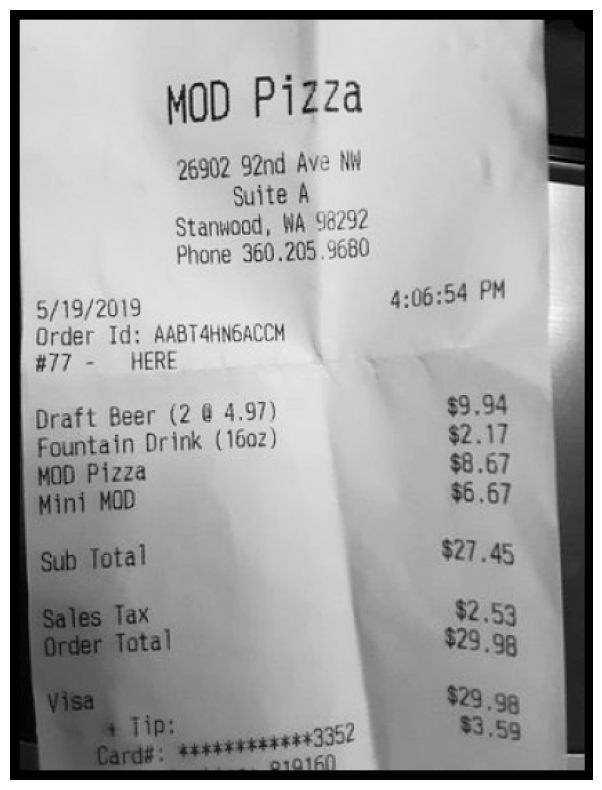

In [ ]:
img = cv2.imread('cv_example.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img, cmap='Greys_r')

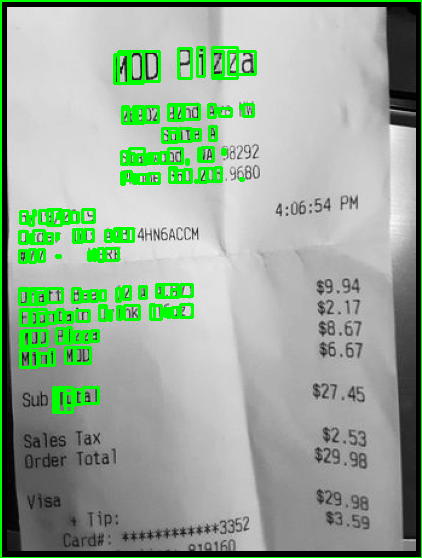

-1

In [ ]:
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
out_below = pytesseract.image_to_string(img)
print("OUTPUT:", out_below)

OUTPUT: qa) Baeza

id Geo

ataao 4:06:54 PM
Didier GD BOD 4HNsAccM
ON - me

$9.94

(BED Geen 02 8 BO
Fantatn Orf68 (exe) $2.17
aes a

 



(-0.5, 421.5, 557.5, -0.5)

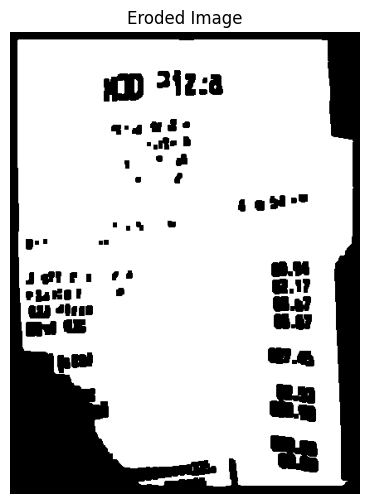

In [ ]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

_, img_bin = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
eroded = cv2.erode(img_bin, kernel, iterations=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

In [ ]:
out_eroded = pytesseract.image_to_string(eroded)
print("OUTPUT eroded image:", out_below)

OUTPUT eroded image: qa) Baeza

id Geo

ataao 4:06:54 PM
Didier GD BOD 4HNsAccM
ON - me

$9.94

(BED Geen 02 8 BO
Fantatn Orf68 (exe) $2.17
aes a

 



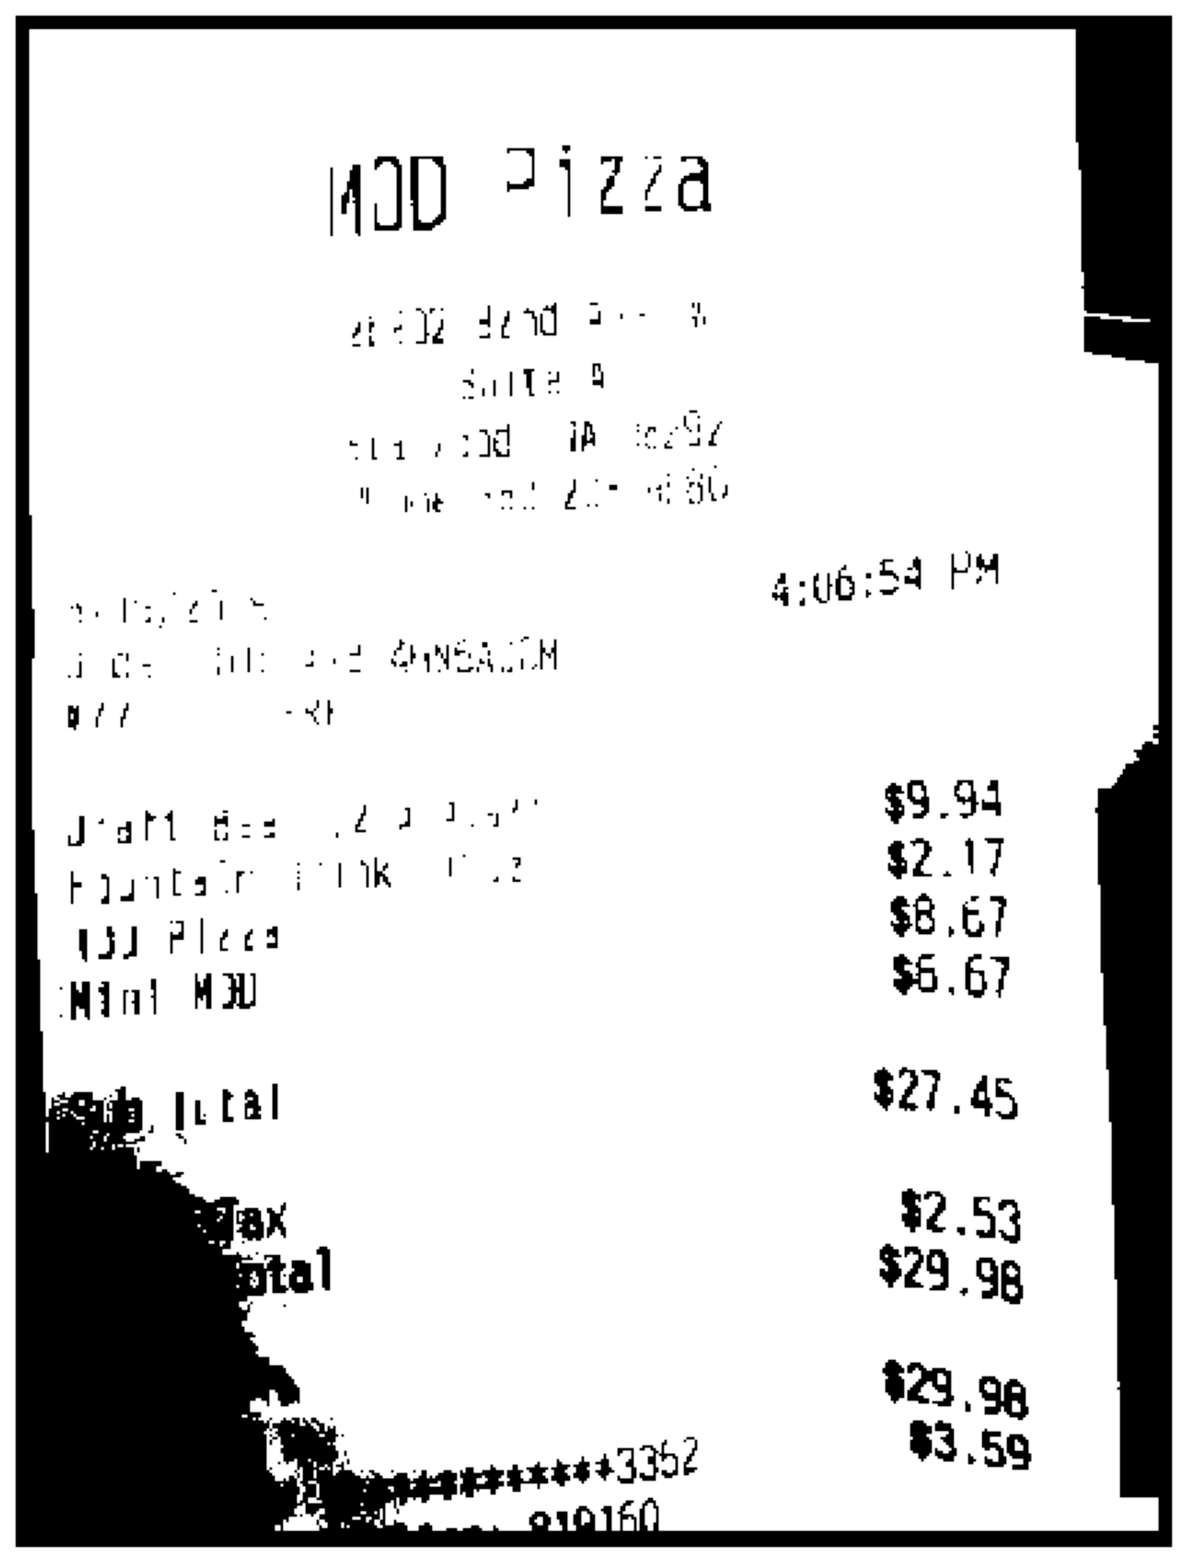

In [ ]:


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray, img_bin = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh = cv2.bitwise_not(img_bin)

contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


cropped = None

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 100 and h > 50:
        if x >= 0 and y >= 0 and x + w <= img.shape[1] and y + h <= img.shape[0]:
            cropped = img_bin[y:y+h, x:x+w]
            break  #

if cropped is not None:
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(cropped, cmap='Greys_r')
    plt.show()
else:
    print("condition not qualified")

In [ ]:
out_cropped = pytesseract.image_to_string(cropped)
print("OUTPUT cropped image:", out_below)

OUTPUT cropped image: qa) Baeza

id Geo

ataao 4:06:54 PM
Didier GD BOD 4HNsAccM
ON - me

$9.94

(BED Geen 02 8 BO
Fantatn Orf68 (exe) $2.17
aes a

 



**Another method using easyocr library**

In [ ]:
!pip install easyocr

In [ ]:
import easyocr

In [ ]:
reader = easyocr.Reader(['en'])

In [ ]:
easyresult = reader.readtext(img)
for i in range(len(easyresult)):
  print(easyresult[i][1])

MOD Biza
0202
0@ [
in M :
Ei7pundg
1e292
JImiB
MLi'
'9680
4:06;54 PM
@ocg
0oar Mo
@'PD4HNGACCM
07 0
KRH
Wiam 0o (2000
59.94
F)ja d
Vhk ma
82.17
88,67
71421
Mint KJD
26,67
Sub It tal
827.45
Sales Tax
62.53
Order Total
429.98
Wisa
529. 98
Tip:
83,59
Cardi
chorail
AJJ
+44+3352
